In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from astropy.time import Time
from astropy.table import Table
from style import output_folder, big_fontsize, base_width, base_height, dpi
import seaborn as sns

In [2]:
path = "data/ZTF20abdnpdo_20200612_NOT_v1.ascii"

In [3]:
redshift = 1. + 0.041

In [4]:
data = pd.read_table(path, names=["wl", "flux", "sky_flux", "flux_unc", "xpixel", "ypixel", "response", "flag"], sep="\s+", comment='#')
        
mask = data["flux"] > 0.
data["flux"][~mask] = 0.00

comp = pd.read_table('data/2004aw_2004-04-07_00-00-00_TNG_DOLORES_SUSPECT.dat', names=["wl", "flux"], sep="\s+", comment='#')

comp_redshift = 1. + 0.0163

# dat = Table.read('data/spec-0391-51782-0220.fits', format='fits')
# sdss = dat.to_pandas()
# print(sdss)
# sdss = pd.read_table('data/spec-0391-51782-0001.fits')

In [5]:
smooth = 12

f = np.array(list(data["flux"]))
sf = np.zeros(len(f) - smooth)
swl = np.zeros(len(f) - smooth)

for i in range(smooth):
    sf += np.array(list(f)[i:-smooth+i])
    swl += np.array(list(data["wl"])[i:-smooth+i])
    
sf /= float(smooth)
swl /= float(smooth)

# sdss_smooth = 10

# sdssf = np.array(list(sdss["flux"]))
# ssf = np.zeros(len(sdssf) - sdss_smooth)
# sswl = np.zeros(len(sdssf) - sdss_smooth)

# for i in range(sdss_smooth):
#     ssf += np.array(list(sdssf)[i:-sdss_smooth+i])
#     sswl += np.array(list(10.**sdss["loglam"])[i:-sdss_smooth+i])
    
# ssf /= float(sdss_smooth)
# sswl /= float(sdss_smooth)


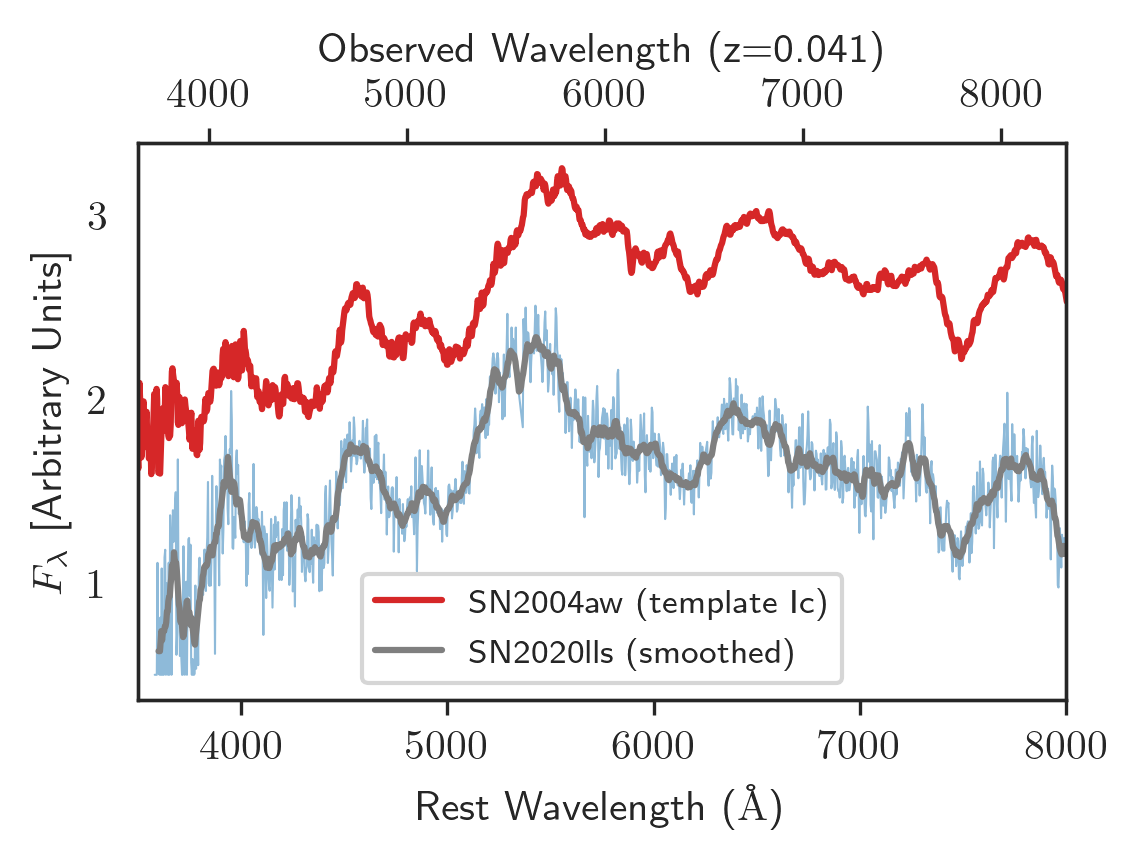

In [7]:
plt.figure(figsize=(base_width, 1.2*base_height), dpi=dpi)
# plt.figure(figsize=())
ax1 = plt.subplot(111)
cols = ["C1", "C7", "k", "k"]
# cols = [":", "--", "-.", "-"]

lines = [
    (r"$\rm{H\alpha}$", 6562.8, 0),
    (r"$\rm{H\beta}$", 4861, 0),
    (r"$\rm{H\gamma}$", 4340, 0)
]

plt.plot(comp["wl"]/comp_redshift, comp["flux"]/np.mean(comp["flux"]) + 1.5, color="C3",label="SN2004aw (template Ic)")
plt.plot(data["wl"]/redshift, data["flux"]/np.mean(data["flux"]) + 0.5, linewidth=0.5, color="C0", alpha=0.5)
plt.plot(swl/redshift, sf/np.mean(sf) + 0.5, color="C7", label="SN2020lls (smoothed)")
plt.legend()

plt.ylabel(r"$F_{\lambda}$ [Arbitrary Units]", fontsize=big_fontsize)
ax1b = ax1.twiny()
ax1.set_xlim(left=3500, right=8000)
rslim = ax1.get_xlim()
ax1b.set_xlim((rslim[0] * redshift, rslim[1] * redshift))
ax1.set_xlabel(r"Rest Wavelength ($\rm \AA$)", fontsize=big_fontsize)
ax1b.set_xlabel(rf"Observed Wavelength (z={redshift-1.:.3f})", fontsize=big_fontsize)
ax1.tick_params(axis='both', which='major', labelsize=big_fontsize)
ax1b.tick_params(axis='both', which='major', labelsize=big_fontsize)
plt.tight_layout()
# sns.despine(right=True, top=False)

filename = "sn2020lls_spectrum.pdf"

output_path = os.path.join(output_folder, f"{filename}")

plt.savefig(f"plots/{filename}")
plt.savefig(output_path)
plt.show()